# Heart Disease Dataset


The dataset contains the 2020 telephone survey results conducted by the Center for Disease Control and Prevention (CDC) through the Behavioral Risk Factor Surveillance System (BRFSS). It includes answers from respondents about their health status such as BMI category, Smoking Status, and their number of Sleeping Hours.


# Objective of the Project

This project aims to answer the following questions:

1. Identify association and relationship among variables:
    1. Is there a relationship between Age and Heart Disease?
    2. How do factors such as BMI, Alochol, and Smoking status affect the likelihood of developing heart disease?
    3. Which ethnicity have high chances of getting heart disease?
    4. What is the impact of lifestyle factors such as exercise on the progression of heart disease?
    

2. Predict outcomes by using different predictive modeling techniques:
    1. If given an unknown data, can we predict if that person has heart disease?
    2. How well do the modeling techniques work?
    3. Which among the predictive modeling techniques have the highest accuracy score?
    4. Are there any limitations and biases that we should be aware of?


# Project Tasks
1. Explore the data to understand structures and patterns among variables:
    1. Describing the data
    2. Cleaning the data (removing outliers, filling in missing values, etc.)
    3. Converting categorical variables to numerical format
    4. Conduct data analysis (univariate, bivariate analysis)
    5. Create visualization to better understand the data
2. Perform different regression models to find relationships among variables
3. Build different predictive models
4. Validate the models
4. Provide overall analysis of steps undertaken


# Data Variable Descriptions

* __HeartDisease__ - if respondent has Coronary Heart Disease (CHD) or Myocardial Infarction (MI) or not
* __BMI__ - the Body Mass Index (BMI) of the respondent
* __Smooking__ - if respondent ever smoked 100 cigarettes in his life
* __AlcoholDrinking__ - if respondent is a heavy drinker
* __Stroke__ - if respondent ever had a stroke
* __PhysicalHealth__ -  the number of days the respondent is physically unwell in the past 30 days
* __MentalHealth__ - the number of days the respondent is mentally unwell in the past 30 days
* __DiffWalking__ - if respondent has difficulty walking or climbing stairs
* __Sex__ - the gender of the respondent
* __AgeCategory__ - the age category the respondent belongs to
* __Race__ - the race of the respondent (American Indian/Alaskan, Asian, Black, Hispanic, Others, White)
* __Diabetic__ - if the respondent is diabetic or not
* __PhysicalActivity__ - if respondent has done any physical activity or exercise in the past 30 days
* __GenHealth__ - the general well-being of the respondent
* __SleepTime__ - the average number of sleep of the respondent in a day
* __Asthma__ - if the respondent has asthma or not
* __KidneyDisease__ - if the respondent was diagnosed with a kidney disease or not (doesn't include kidney stones, bladder infection or incontinence)
* __SkinCancer__ - if the respondent was diagnosed with skin cancer or not

# Predictive Modeling Techniques used:

1. K-Fold Cross Validation
2. Naive Bayes
3. Decision Tree
4. Logistic Regression

## I. Import Libraries

In [1]:
#import necessary libraries such as numpy, seaborn, sklr, etc.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error



## II. Data Collection

In this section, data is imported from the 2020 telephone survey results conducted by the Center for Disease Control and Prevention (CDC) through the Behavioral Risk Factor Surveillance System (BRFSS), and can be found through this [link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) from Kaggle.

In [2]:
#import the 2020 Heart Disease Dataset to the portfolio
Heart_Data = pd.read_csv('heart_2020_cleaned.csv')
Heart_Data.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

## III. Data Overview

Data Overview provides an overview of what the data looks like. It gives an idea about the shape, type, structure, and values of the dataset.

In [3]:
#Show length of the data
len(Heart_Data)

319795

In [4]:
#Show shape of the data
Heart_Data.shape

(319795, 18)

In [5]:
#Show info of data (columns, labels,type)
Heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
#Show unique values per column:
for col in Heart_Data:
  print(Heart_Data[col].unique())

['No' 'Yes']
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In [7]:
#Show the statistical description of Data
Heart_Data.describe(include='all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN          No  Female       65-69   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity  GenHealth      SleepTime  Asthma  \
count    319795           319795     319795  319795.000000  319795   
unique        4                2          5            NaN       2   
top          No              Yes  Very good            NaN      No   
freq     269653           247957     113858            NaN  276923   
mean        NaN              NaN        NaN       7.097075     NaN   
std         NaN              NaN        NaN       1.436007     NaN   
min         NaN              NaN        NaN       1.000000     NaN   
25%         NaN              NaN        NaN       6.000000     NaN   
50%         NaN              NaN        NaN       7.000000     NaN   
75%         NaN              NaN        NaN       8.000000     NaN   
max         NaN              NaN        NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

The output above gives the following information about the data:
* The data has 319,795 rows and 18 columns.
* Data values are comprised of objects and floats.
* 14 columns are in categorical form, while only 4 are in numerical form
 

## IV. Exploratory Data Analysis

This section analyses the data variables and their relationship to one another using Univariate, Bivariate, Multivariate Analysis. It also provides data visualization to better understand the data.

### A. Univariate Analysis

Text(0.5, 0, 'Age Category')

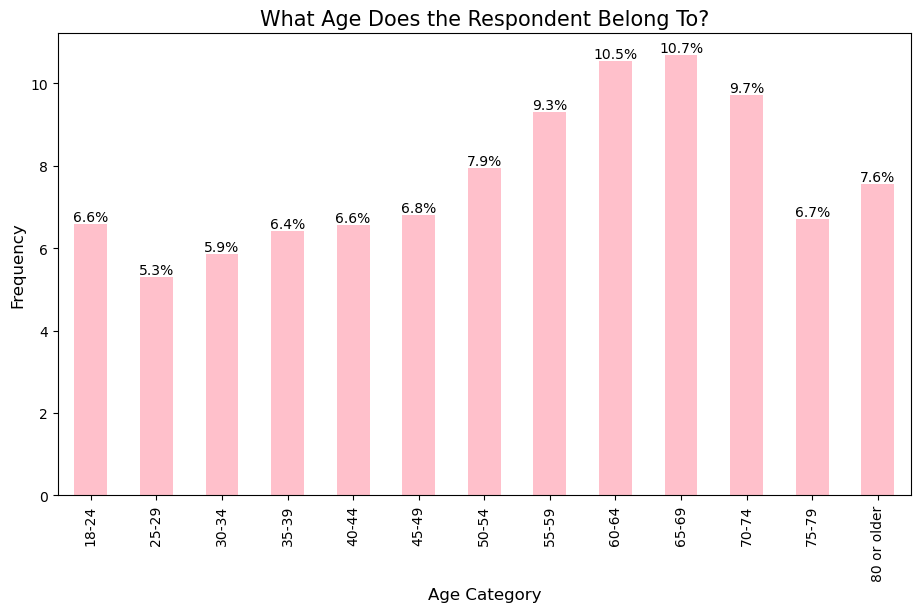

In [8]:
#Barplot of Age Distribution
Age_Cat = Heart_Data['AgeCategory'].value_counts()
Age_CatPercent = Age_Cat.apply(lambda i : i / len(Heart_Data) * 100)
plt.figure(figsize=(11,6))

ax = Age_CatPercent.sort_index(ascending=True).plot(kind = 'bar', color = ['pink'])
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.title('What Age Does the Respondent Belong To?', fontsize=15)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Age Category', fontsize=12)

Text(0.5, 0, 'Race Category')

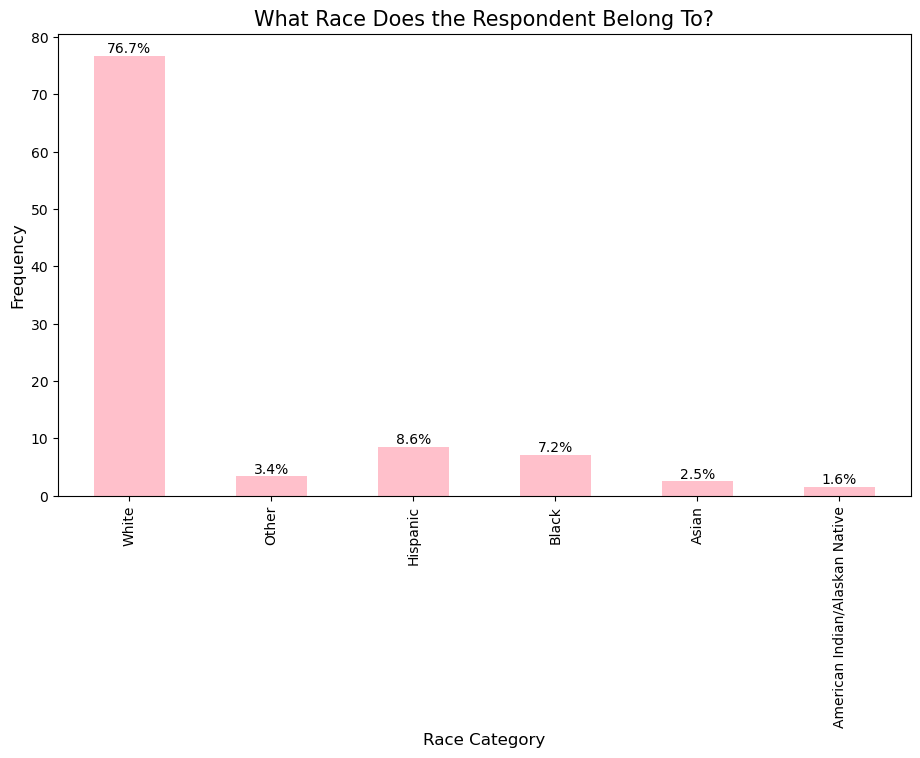

In [9]:
#Barplot of Age Distribution
Race_Cat = Heart_Data['Race'].value_counts()
Race_CatPercent = Race_Cat.apply(lambda i : i / len(Heart_Data) * 100)
plt.figure(figsize=(11,6))

ax = Race_CatPercent.sort_index(ascending=False).plot(kind = 'bar', color = ['pink'])
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.title('What Race Does the Respondent Belong To?', fontsize=15)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Race Category', fontsize=12)

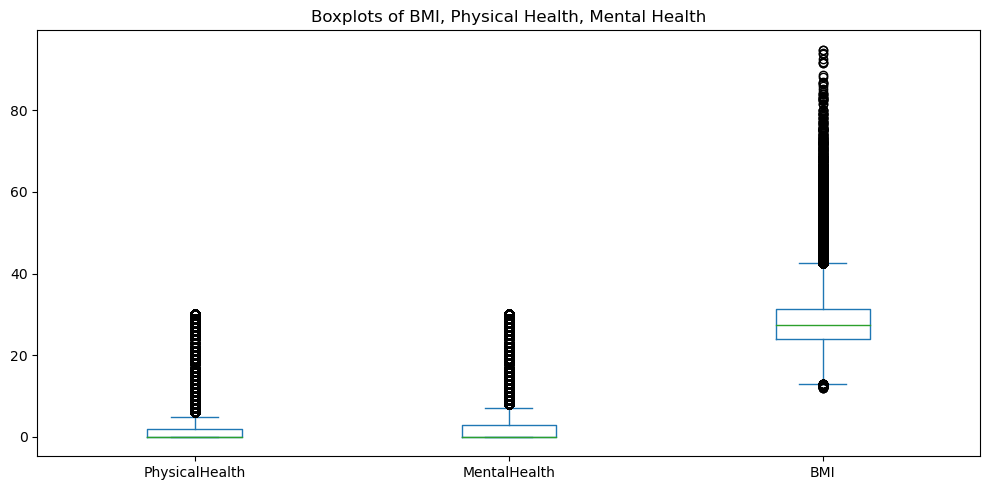

In [10]:
#Boxplot of BMI, Physical and Mental Health
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = Heart_Data[['PhysicalHealth', 'MentalHealth', 'BMI']].plot(kind='box', title='Boxplots of BMI, Physical Health, Mental Health')
plt.show()

Text(0.5, 0, 'Yes or No')

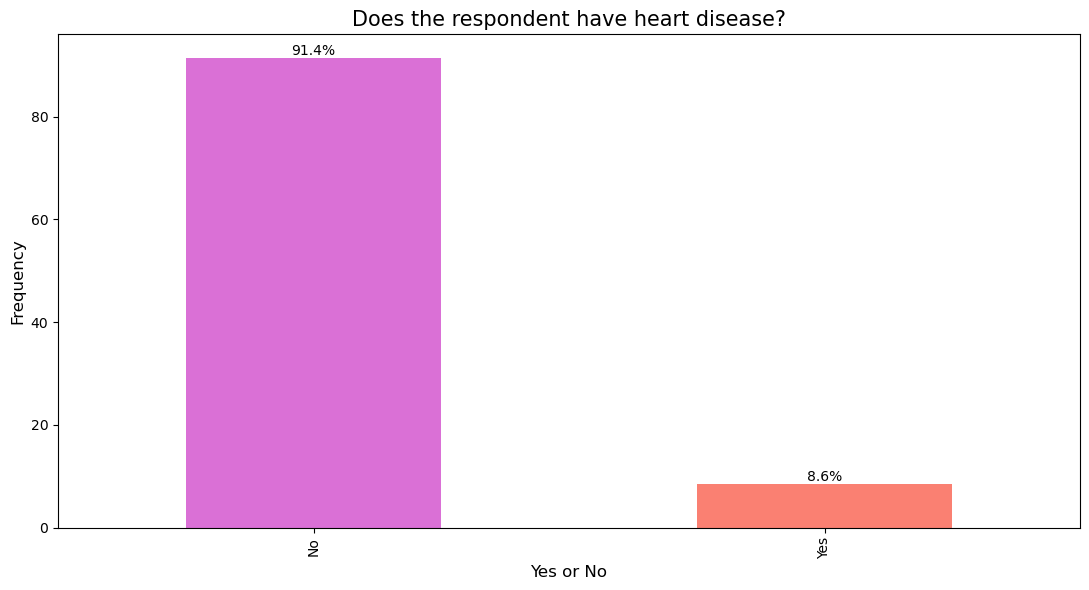

In [11]:
#Barplot of Heart Disease
Heart_Cat = Heart_Data['HeartDisease'].value_counts()
Heart_CatPercent = Heart_Cat.apply(lambda i : i / len(Heart_Data) * 100)
plt.figure(figsize=(11,6))

ax = Heart_CatPercent.sort_index(ascending=True).plot(kind = 'bar', color = ['orchid', 'salmon'])
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.title('Does the respondent have heart disease?', fontsize=15)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Yes or No', fontsize=12)

### B. Multivariate Analysis

Text(0.5, 1.0, 'Gender v/s Heart Disease')

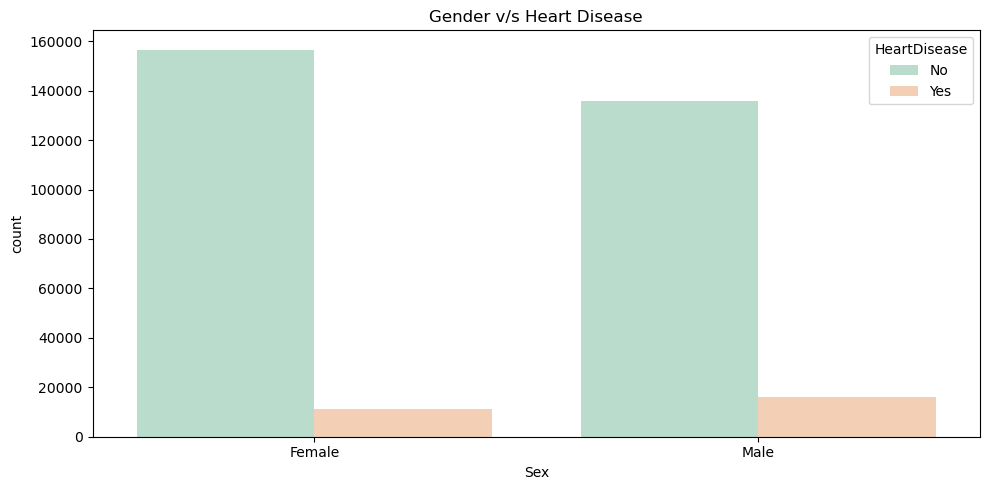

In [12]:
#Barplot of Gender with or without Heart Disease
sns.set_palette('Pastel2')
sns.countplot(data= Heart_Data, x='Sex',hue='HeartDisease', )
plt.title('Gender v/s Heart Disease')

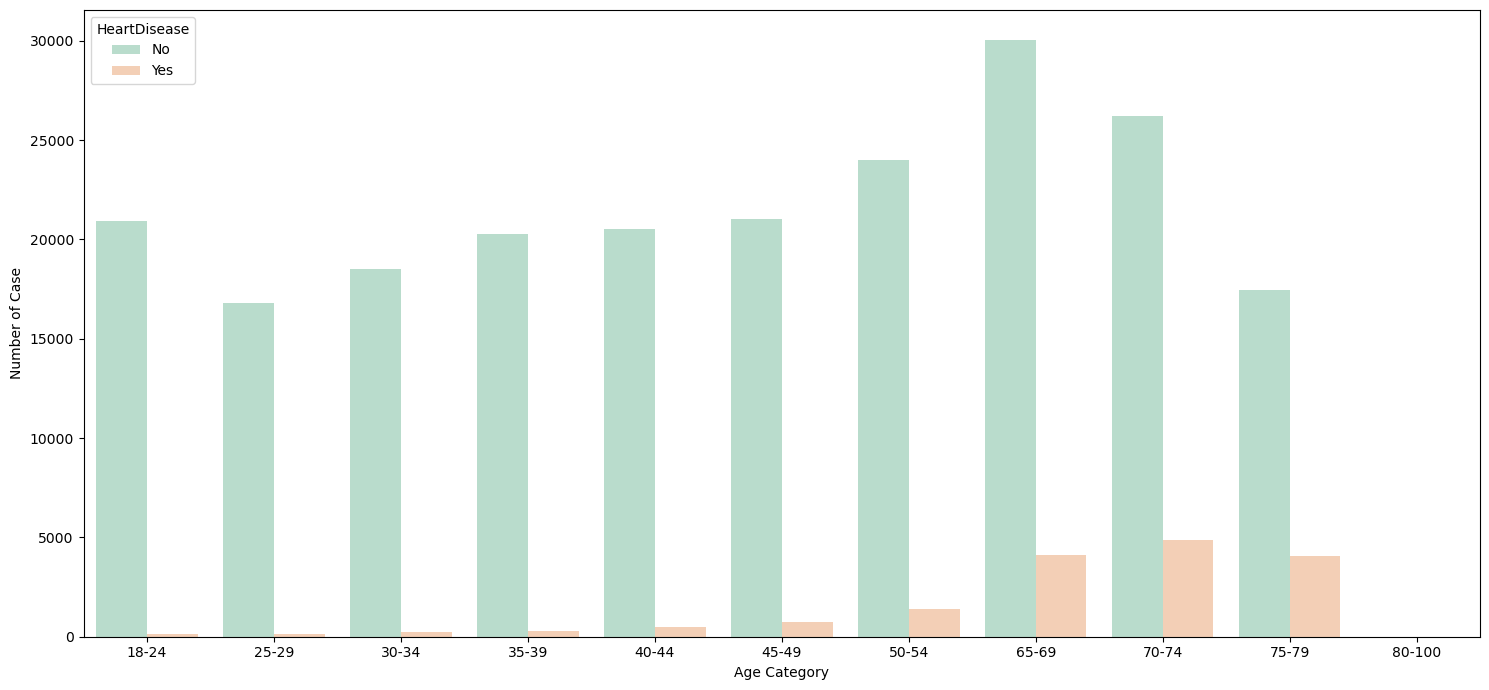

In [13]:
#Countplot of Age and Heart Disease Status
sns.set_palette('Pastel2')
plt.figure(figsize =(15,7))
sns.countplot(data = Heart_Data, x = 'AgeCategory', hue = 'HeartDisease', order=['18-24', '25-29', '30-34', '35-39',
                                                                                '40-44', '45-49','50-54','65-69',
                                                                                 '70-74','75-79','80-100'])
plt.xlabel('Age Category')
plt.ylabel('Number of Case')
plt.show()

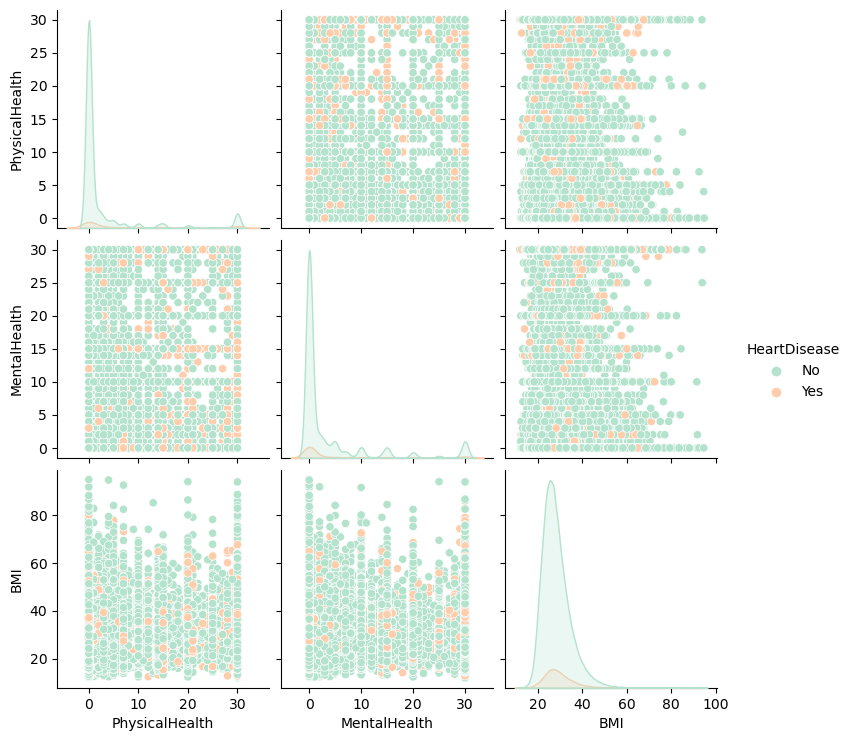

In [14]:
#Scatterplot
sns.pairplot (data = Heart_Data, vars=['PhysicalHealth', 'MentalHealth', 'BMI'], hue = 'HeartDisease')
plt.show()

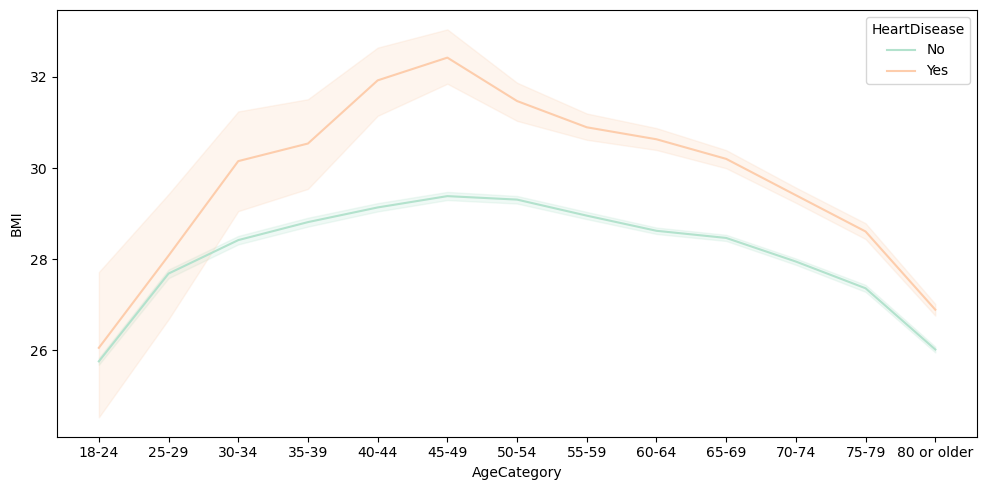

In [15]:
#Line plot of Age and BMI
Heart_Data = Heart_Data.sort_values(by='AgeCategory', ascending=True)
sns.lineplot(data = Heart_Data, x = 'AgeCategory', y = 'BMI', hue = 'HeartDisease');
plt.show()

<AxesSubplot:>

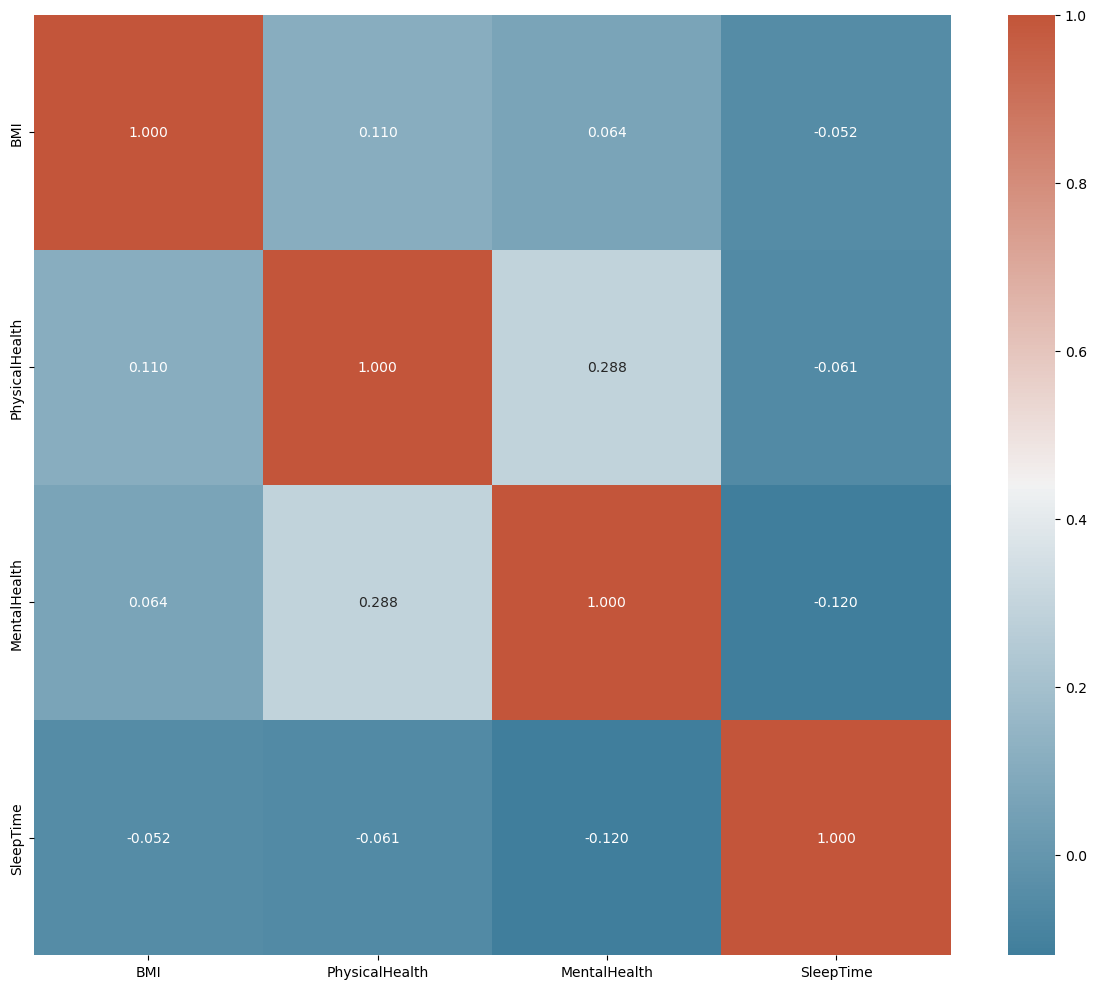

In [18]:
#Select columns for heatmap
selected_variables = Heart_Data.loc[:, ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

#Display correlation between vlues  and all other features using heatmap

correlation = selected_variables.corr()
ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=cmap, fmt='.3f')

### Observations from the Data Analysis:

* Respondents where clustered into 13 age categories. The majority which is at 10.7%, belongs to the age group of 65-69. It is followed by those who are in the age 60-64.
* Majority of the respondents is White at 76.7%. The rest of the respondents belong to Hispanic, Black, Asian, American Indian and others. These subgroups only comprise less than 10% of the total sample population. 
* There were outliers in all numerical features (Physical Health, Mental Health, BMI). 
* 91% of the respondents have no Heart Disease
* Only 8.6% have Heart Disease, and within that percentage, males have higher frequency of having Heart Disease.
* Most respondents that have heart disease are within the age ranges of 70-74,  65-69 and 75-79.
* When plotting the scatterplot, there seemed to be no association between numerical features.
* BMI usually peaked at the age of 45-49, and will start to decline as the age increases.
* The heatmap represents the correlation between numerical features and there seemed to be little or no correlation between the variables 'PhysicalHealth' , 'MentalHealth', 'DiffWalking'

## IV. Data Cleaning

This section is about cleaning the data , removing/filling in missing values and outliers, changing categorical values to numerical, and reformating the dataset.

In [19]:
#Check missing values 
missing_values = Heart_Data.isnull().sum()
print (missing_values)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [20]:
#Remove Rows with Duplicates
Heart_Data.drop_duplicates(keep=False, inplace=True)
Heart_Data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
289336           No  21.83      No              No     No            20.0   
92977            No  21.14      No              No     No             0.0   
228704           No  20.81      No              No     No             0.0   
49749            No  20.84     Yes              No     No             0.0   
49753            No  24.33      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
261373           No  30.23     Yes              No     No             0.0   
203667           No  25.83      No              No     No             0.0   
261380          Yes  20.92     Yes              No     No             0.0   
261449           No  22.31      No              No     No             3.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
289336           8.0          No    Male        18-24     Other       No   
92977            0.0          No  Female        18-24     White       No   
228704          10.0          No  Female        18-24     White       No   
49749            3.0          No    Male        18-24     Asian       No   
49753            0.0          No    Male        18-24  Hispanic       No   
...              ...         ...     ...          ...       ...      ...   
261373           0.0          No    Male  80 or older  Hispanic       No   
203667           3.0          No    Male  80 or older     White       No   
261380           0.0          No    Male  80 or older     White       No   
261449           0.0          No    Male  80 or older  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
289336              Yes  Excellent        8.0     No            No         No  
92977               Yes  Excellent        9.0     No            No         No  
228704              Yes  Excellent        7.0    Yes            No         No  
49749                No       Good       10.0     No            No         No  
49753               Yes  Excellent        7.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
261373              Yes  Excellent       10.0     No            No         No  
203667              Yes  Very good        7.0     No            No         No  
261380              Yes       Fair        8.0     No            No         No  
261449               No       Fair        9.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[289865 rows x 18 columns]

In [21]:
#Reformat Age Category

Heart_Data['AgeCategory'] = Heart_Data['AgeCategory'].replace({'80 or older': '80-120'})
Heart_Data.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
289336           No  21.83      No              No     No            20.0   
92977            No  21.14      No              No     No             0.0   
228704           No  20.81      No              No     No             0.0   
49749            No  20.84     Yes              No     No             0.0   
49753            No  24.33      No              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCategory      Race Diabetic  \
289336           8.0          No    Male       18-24     Other       No   
92977            0.0          No  Female       18-24     White       No   
228704          10.0          No  Female       18-24     White       No   
49749            3.0          No    Male       18-24     Asian       No   
49753            0.0          No    Male       18-24  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
289336              Yes  Excellent        8.0     No            No         No  
92977               Yes  Excellent        9.0     No            No         No  
228704              Yes  Excellent        7.0    Yes            No         No  
49749                No       Good       10.0     No            No         No  
49753               Yes  Excellent        7.0     No            No         No

In [22]:
age_groups = Heart_Data.AgeCategory.unique()
age_groups

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-120'],
      dtype=object)

In [23]:
Heart_Data = Heart_Data.sort_values(by='AgeCategory', ascending=True)
Heart_Data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
289336           No  21.83      No              No     No            20.0   
161164           No  29.56      No              No     No             0.0   
159401           No  32.32      No              No     No             0.0   
67505            No  34.46      No              No     No             0.0   
161168           No  21.95      No              No     No             3.0   
...             ...    ...     ...             ...    ...             ...   
167819           No  25.70      No              No     No             0.0   
232327          Yes  24.05      No              No     No            15.0   
76937            No  26.52     Yes              No     No             0.0   
232365           No  21.46     Yes              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCategory      Race  \
289336           8.0          No    Male       18-24     Other   
161164           0.0          No    Male       18-24     White   
159401           7.0          No    Male       18-24     White   
67505           10.0          No  Female       18-24     Asian   
161168          15.0          No  Female       18-24     Black   
...              ...         ...     ...         ...       ...   
167819           0.0          No  Female      80-120     White   
232327           0.0         Yes    Male      80-120     White   
76937            0.0          No  Female      80-120     White   
232365           0.0         Yes  Female      80-120     White   
319794           0.0          No  Female      80-120  Hispanic   

                       Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
289336                       No              Yes  Excellent        8.0     No   
161164                       No              Yes       Good        8.0     No   
159401                       No              Yes       Good        7.0     No   
67505                        No              Yes       Fair        6.0    Yes   
161168  No, borderline diabetes              Yes  Very good        6.0     No   
...                         ...              ...        ...        ...    ...   
167819                       No              Yes  Very good        7.0     No   
232327                       No              Yes       Fair        8.0     No   
76937                        No               No  Excellent        8.0     No   
232365                       No              Yes  Excellent        7.0     No   
319794                       No              Yes       Good        8.0     No   

       KidneyDisease SkinCancer  
289336            No         No  
161164            No         No  
159401            No         No  
67505             No         No  
161168            No         No  
...              ...        ...  
167819            No         No  
232327            No         No  
76937             No         No  
232365            No         No  
319794            No         No  

[289865 rows x 18 columns]

In [24]:
#Change 'No, borderline diabetes' to 'No', and 'Yes (during pregnancy)' to ' Yes'
Heart_Data['Diabetic'] = Heart_Data['Diabetic'].replace({'No, borderline diabetes': 'No','Yes (during pregnancy)': 'Yes' })
Heart_Data.Diabetic.unique()

array(['No', 'Yes'], dtype=object)

In [25]:
#Show info of data (columns, labels,type)
Heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289865 entries, 289336 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289865 non-null  object 
 1   BMI               289865 non-null  float64
 2   Smoking           289865 non-null  object 
 3   AlcoholDrinking   289865 non-null  object 
 4   Stroke            289865 non-null  object 
 5   PhysicalHealth    289865 non-null  float64
 6   MentalHealth      289865 non-null  float64
 7   DiffWalking       289865 non-null  object 
 8   Sex               289865 non-null  object 
 9   AgeCategory       289865 non-null  object 
 10  Race              289865 non-null  object 
 11  Diabetic          289865 non-null  object 
 12  PhysicalActivity  289865 non-null  object 
 13  GenHealth         289865 non-null  object 
 14  SleepTime         289865 non-null  float64
 15  Asthma            289865 non-null  object 
 16  KidneyDisease  

In [26]:
#Show unique values per column:
for col in Heart_Data:
  print(Heart_Data[col].unique())

['No' 'Yes']
[21.83 29.56 32.32 ... 41.23 80.06 46.56]
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[20.  0.  3.  6.  2.  1. 10.  7.  4.  5. 15. 30. 14. 29. 21. 28.  9. 13.
 11. 25.  8. 16. 18. 22. 27. 23. 12. 26. 17. 19. 24.]
[ 8.  0.  7. 10. 15.  5.  1.  2.  4.  3. 20. 30. 14. 23.  6. 17. 25. 19.
 12.  9. 21. 28. 29. 16. 18. 13. 27. 26. 22. 24. 11.]
['No' 'Yes']
['Male' 'Female']
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80-120']
['Other' 'White' 'Asian' 'Black' 'Hispanic'
 'American Indian/Alaskan Native']
['No' 'Yes']
['Yes' 'No']
['Excellent' 'Good' 'Fair' 'Very good' 'Poor']
[ 8.  7.  6.  5.  3.  4. 11. 12.  9. 10. 15. 22.  1. 13. 18.  2. 16. 24.
 17. 14. 21. 20. 23. 19.]
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [27]:
#Covert categorical values to numerical
dummies = pd.get_dummies(Heart_Data, columns=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                                             'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma',
                                             'KidneyDisease', 'SkinCancer'])

#Drop Numerical Columns from the dummy dataframe
dummies1 = dummies.drop(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', "HeartDisease_No"], axis=1)


# drop the categorical columns from the original data
Heart_Data1 = Heart_Data.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
             'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma',
             'KidneyDisease','SkinCancer'], axis=1)

# concatenate dummies1 with Heart_Data1
Heart_Data2 = pd.concat([Heart_Data1, dummies1], axis=1)

Heart_Data2 = Heart_Data2.rename(columns={'HeartDisease_Yes': 'HeartDisease'})
Heart_Data2

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease  \
289336  21.83            20.0           8.0        8.0             0   
161164  29.56             0.0           0.0        8.0             0   
159401  32.32             0.0           7.0        7.0             0   
67505   34.46             0.0          10.0        6.0             0   
161168  21.95             3.0          15.0        6.0             0   
...       ...             ...           ...        ...           ...   
167819  25.70             0.0           0.0        7.0             0   
232327  24.05            15.0           0.0        8.0             1   
76937   26.52             0.0           0.0        8.0             0   
232365  21.46             0.0           0.0        7.0             0   
319794  46.56             0.0           0.0        8.0             0   

        Smoking_No  Smoking_Yes  AlcoholDrinking_No  AlcoholDrinking_Yes  \
289336           1            0                   1                    0   
161164           1            0                   1                    0   
159401           1            0                   1                    0   
67505            1            0                   1                    0   
161168           1            0                   1                    0   
...            ...          ...                 ...                  ...   
167819           1            0                   1                    0   
232327           1            0                   1                    0   
76937            0            1                   1                    0   
232365           0            1                   1                    0   
319794           1            0                   1                    0   

        Stroke_No  ...  GenHealth_Fair  GenHealth_Good  GenHealth_Poor  \
289336          1  ...               0               0               0   
161164          1  ...               0               1               0   
159401          1  ...               0               1               0   
67505           1  ...               1               0               0   
161168          1  ...               0               0               0   
...           ...  ...             ...             ...             ...   
167819          1  ...               0               0               0   
232327          1  ...               1               0               0   
76937           1  ...               0               0               0   
232365          1  ...               0               0               0   
319794          1  ...               0               1               0   

        GenHealth_Very good  Asthma_No  Asthma_Yes  KidneyDisease_No  \
289336                    0          1           0                 1   
161164                    0          1           0                 1   
159401                    0          1           0                 1   
67505                     0          0           1                 1   
161168                    1          1           0                 1   
...                     ...        ...         ...               ...   
167819                    1          1           0                 1   
232327                    0          1           0                 1   
76937                     0          1           0                 1   
232365                    0          1           0                 1   
319794                    0          1           0                 1   

        KidneyDisease_Yes  SkinCancer_No  SkinCancer_Yes  
289336                  0              1               0  
161164                  0              1               0  
159401                  0              1               0  
67505                   0              1               0  
161168                  0              1               0  
...                   ...            ...             ...  
167819                  0              1               0  
232327

In [28]:
#See descriptive statistics of all variables
Heart_Data2.describe().T

count       mean       std    min  \
BMI                                  289865.0  28.521254  6.542182  12.02   
PhysicalHealth                       289865.0   3.717099  8.271924   0.00   
MentalHealth                         289865.0   4.279499  8.246458   0.00   
SleepTime                            289865.0   7.076349  1.488499   1.00   
HeartDisease                         289865.0   0.093685  0.291390   0.00   
Smoking_No                           289865.0   0.572028  0.494786   0.00   
Smoking_Yes                          289865.0   0.427972  0.494786   0.00   
AlcoholDrinking_No                   289865.0   0.926190  0.261462   0.00   
AlcoholDrinking_Yes                  289865.0   0.073810  0.261462   0.00   
Stroke_No                            289865.0   0.958398  0.199679   0.00   
Stroke_Yes                           289865.0   0.041602  0.199679   0.00   
DiffWalking_No                       289865.0   0.847160  0.359834   0.00   
DiffWalking_Yes                      289865.0   0.152840  0.359834   0.00   
Sex_Female                           289865.0   0.532141  0.498967   0.00   
Sex_Male                             289865.0   0.467859  0.498967   0.00   
AgeCategory_18-24                    289865.0   0.066569  0.249274   0.00   
AgeCategory_25-29                    289865.0   0.054598  0.227194   0.00   
AgeCategory_30-34                    289865.0   0.060004  0.237494   0.00   
AgeCategory_35-39                    289865.0   0.064809  0.246190   0.00   
AgeCategory_40-44                    289865.0   0.065586  0.247557   0.00   
AgeCategory_45-49                    289865.0   0.067952  0.251665   0.00   
AgeCategory_50-54                    289865.0   0.078267  0.268592   0.00   
AgeCategory_55-59                    289865.0   0.090756  0.287262   0.00   
AgeCategory_60-64                    289865.0   0.102579  0.303408   0.00   
AgeCategory_65-69                    289865.0   0.103997  0.305257   0.00   
AgeCategory_70-74                    289865.0   0.097000  0.295959   0.00   
AgeCategory_75-79                    289865.0   0.069419  0.254165   0.00   
AgeCategory_80-120                   289865.0   0.078464  0.268901   0.00   
Race_American Indian/Alaskan Native  289865.0   0.017884  0.132531   0.00   
Race_Asian                           289865.0   0.027323  0.163023   0.00   
Race_Black                           289865.0   0.078264  0.268587   0.00   
Race_Hispanic                        289865.0   0.092398  0.289588   0.00   
Race_Other                           289865.0   0.037452  0.189867   0.00   
Race_White                           289865.0   0.746679  0.434914   0.00   
Diabetic_No                          289865.0   0.851855  0.355244   0.00   
Diabetic_Yes                         289865.0   0.148145  0.355244   0.00   
PhysicalActivity_No                  289865.0   0.244259  0.429647   0.00   
PhysicalActivity_Yes                 289865.0   0.755741  0.429647   0.00   
GenHealth_Excellent                  289865.0   0.190847  0.392970   0.00   
GenHealth_Fair                       289865.0   0.119511  0.324389   0.00   
GenHealth_Good                       289865.0   0.309230  0.462177   0.00   
GenHealth_Poor                       289865.0   0.038925  0.193417   0.00   
GenHealth_Very good                  289865.0   0.341487  0.474209   0.00   
Asthma_No                            289865.0   0.853535  0.353572   0.00   
Asthma_Yes                           289865.0   0.146465  0.353572   0.00   
KidneyDisease_No                     289865.0   0.959385  0.197398   0.00   
KidneyDisease_Yes                    289865.0   0.040615  0.197398   0.00   
SkinCancer_No                        289865.0   0.900550  0.299265   0.00   
SkinCancer_Yes                       289865.0   0.099450  0.299265   0.00   

                                       25%    50%    75%    max  
BMI                                  24.03  27.44  31.87  94.85  
PhysicalHealth                        0.00   0.00   2.00 

## Data Cleaning Summary and Analysis:
* There are no missing values on the dataset
* Duplicates in the dataset were deleted
* Outliers where preserved and not removed since these variables can be genuine data points that represent a unique characteristic of a respondent's health status
* Responses on the Diabetic feature were regrouped into two categorical answers only - Yes or No
* Categorical variables were converted to numerical variables using dummies
* Age Category was groups in ascending order


# V. Data Pre-Processing


In this section, dataset is split into train and test sets, and are normalized as depicted below:

### A. Splitting the Data

In [29]:
#split the data into training and testing sets
train_values, test_values = train_test_split(Heart_Data2, test_size=0.20, random_state=42)

print("X_train shape: {}".format(train_values.shape))
print("y_train shape: {}".format(test_values.shape))

X_train shape: (231892, 49)
y_train shape: (57973, 49)


In [30]:
# Split the train set into features and labels
X_train= train_values.drop('HeartDisease', axis=1)
y_train= train_values['HeartDisease']

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format( y_train.shape))

X_train shape: (231892, 48)
y_train shape: (231892,)


In [31]:
# split the test set into features and labels
X_test= test_values.drop('HeartDisease', axis=1)
y_test= test_values['HeartDisease']

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format( y_test.shape))

X_test shape: (57973, 48)
y_test shape: (57973,)


### B. Normalizing the Datasets

In [32]:
#Scale the values using StandardScaler function

scaler=StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test) 


# VI. Predictive Modeling Techniques

In this section,  different classification models will be created to see which among them have the highest performance based on evaluation metrics - Recall, Accuracy, Precision, and F-Scores. The objective of these models is to give accurate predictions of Heart Disease among patients or respondents. 

* Target Variable - Heart Disease
* Independent variable - BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer

### Classification Models

## a. Model 1: KNN Cross Validation

In [33]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
HeartData_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
HeartData_knn.fit(X_train, y_train)

# Perform K-fold cross-validation
scores = cross_val_score(HeartData_knn, X_train, y_train, cv=10)

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


Cross-validation scores: [0.8614489  0.85661923 0.8604942  0.85523308 0.86114106 0.85609556
 0.85937298 0.85751865 0.85820863 0.858683  ]
Mean score: 0.8584815297419774
Standard deviation: 0.0020366512981995336


In [35]:
#print output of evaluation of KNN

from sklearn.metrics import accuracy_score
y_pred = HeartData_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of KNN: ", accuracy)
print("Precison of KNN: ", precision)
print("Recall of KNN: ", recall)
print("F1 of KNN: ", f1)


Accuracy of KNN:  0.8578993669466821
Precison of KNN:  0.5832276244902417
Recall of KNN:  0.5829817833638191
F1 of KNN:  0.5831043571954425


## b. Other Models: Naive Bayes, Decision Tree,  Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Define the models
models = {'Naive Bayes': GaussianNB(),
         'Decision tree':DecisionTreeClassifier(),
          'Logistic Regression':LogisticRegression()
          }

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    
    # Print the evaluation metrics for the model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Area Under Curve:: {f1:.2f}")
    
    print("------------------------")



Model: Naive Bayes
Accuracy: 0.73
Precision: 0.59
Recall: 0.74
F1-score: 0.59
Area Under Curve:: 0.59
------------------------
Model: Decision tree
Accuracy: 0.85
Precision: 0.58
Recall: 0.58
F1-score: 0.58
Area Under Curve:: 0.58
------------------------
Model: Logistic Regression
Accuracy: 0.91
Precision: 0.73
Recall: 0.55
F1-score: 0.56
Area Under Curve:: 0.56
------------------------


# VI. Evaluation and Visualization

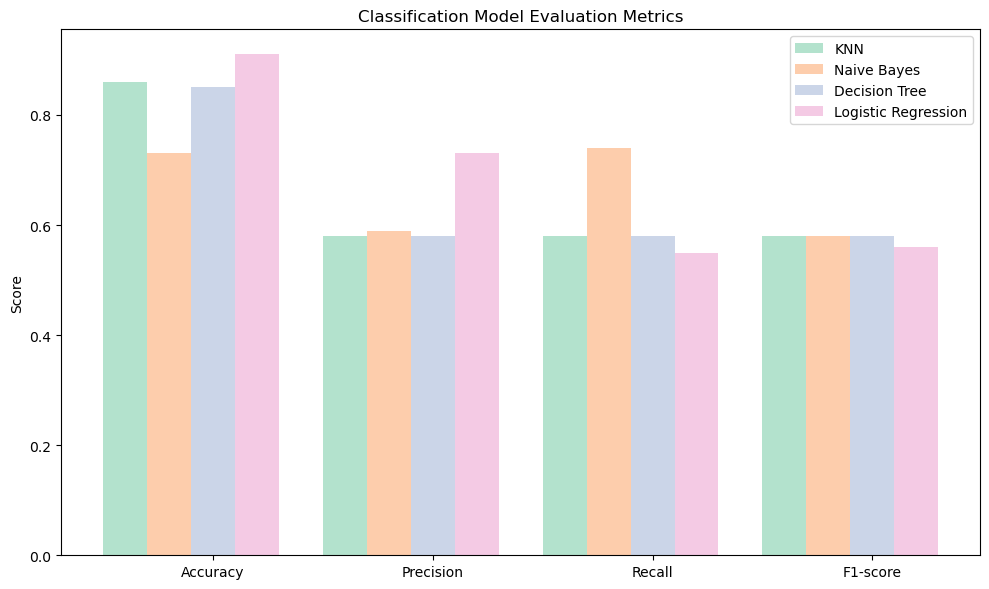

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Define the models and their evaluation metrics
models = {'KNN': [0.86, 0.58, 0.58, 0.58],
          'Naive Bayes': [0.73, 0.59, 0.74, 0.58],
          'Decision Tree': [0.85, 0.58, 0.58, 0.58],
         'Logistic Regression': [0.91, 0.73, 0.55, 0.56]}

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.2

# Set the x positions of the bars
x_pos = np.arange(len(metric_names))

# Plot the bars for each model
for i, (name, metrics) in enumerate(models.items()):
    ax.bar(x_pos + i*bar_width, metrics, bar_width, label=name)

# Set the tick marks and labels
ax.set_xticks(x_pos + bar_width*len(models)/2)
ax.set_xticklabels(metric_names)

# Set the y axis label
ax.set_ylabel('Score')

# Add a title and legend
ax.set_title('Classification Model Evaluation Metrics')
ax.legend()

# Show the plot
plt.show()


# V. Analysis

## Classification Model Analysis

From the evaluation scores of the four classification models, we can conclude that the Logistics Regression has the highest performance in terms of predicting the target variable which is if the person has Heart Disease or not. The said model can accurately predict  91% of patients with Heart Disease and No heart Disease from the given sample population. 

The model with the lowest performance is the Naive Bayes with 73% Accuracy, 59% Precision and 74% on Precision and 59%  Recall. Out of three (3) models, it is therefore best to use the Logistic Regression.